In [13]:
import csv
import datetime
import io
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd



In [14]:
# https://catalog.data.metro.tokyo.lg.jp/dataset/t000010d0000000068
# 東京都 新型コロナウイルス陽性患者発表詳細
raw_log_url = 'https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv'
df_tokyo_log = pd.read_csv(raw_log_url, parse_dates=['公表_年月日'])
df_tokyo_log

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,金,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,土,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,木,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,木,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN
4,5,130001,東京都,NaN,2020-02-14,金,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,3952,130001,東京都,NaN,2020-04-27,月,NaN,NaN,30代,男性,NaN,NaN,NaN,NaN,NaN,NaN
3943,3953,130001,東京都,NaN,2020-04-27,月,NaN,NaN,50代,男性,NaN,NaN,NaN,NaN,NaN,NaN
3944,3954,130001,東京都,NaN,2020-04-27,月,NaN,NaN,20代,男性,NaN,NaN,NaN,NaN,NaN,NaN
3945,3955,130001,東京都,NaN,2020-04-27,月,NaN,NaN,20代,男性,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_by_gender = df_tokyo_log.groupby(['公表_年月日', '患者_性別']).count()['都道府県名'].reset_index()
df_by_gender = df_by_gender.rename(columns={'公表_年月日':'date', '患者_性別':'gender', '都道府県名':'count'})
df_by_gender = df_by_gender.pivot_table('count', 'date', 'gender').fillna(0)
df_by_gender = df_by_gender.rename(columns={'男性':'M', '女性':'F'})
df_by_gender

gender,不明,F,M,調査中
date,,,,
2020-01-24,0.0,0.0,1.0,0.0
2020-01-25,0.0,1.0,0.0,0.0
2020-01-30,0.0,1.0,0.0,0.0
2020-02-13,0.0,0.0,1.0,0.0
2020-02-14,0.0,1.0,1.0,0.0
...,...,...,...,...
2020-04-23,0.0,63.0,71.0,0.0
2020-04-24,1.0,92.0,68.0,0.0
2020-04-25,0.0,54.0,49.0,0.0


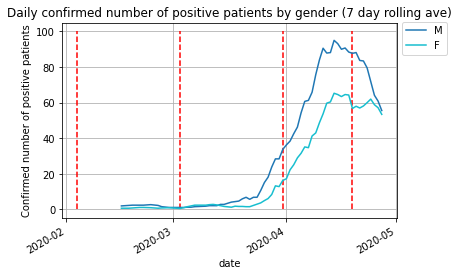

In [16]:
window = 7
title = "Daily confirmed number of positive patients by gender ({} day rolling ave)".format(window)
ax = df_by_gender[['M','F']].rolling(window).mean().plot(title=title, grid=True, cmap=plt.get_cmap("tab10"))
ax.legend(bbox_to_anchor=(1, 1.03), loc='upper left')
ax.xaxis.set_major_locator(mdates.MonthLocator())

reference_dates = pd.to_datetime([
    '2020-02-04',
    '2020-03-03',
    '2020-03-31',
    '2020-04-19'
    ])
plt.ylabel("Confirmed number of positive patients")
plt.vlines(reference_dates, 0, 100, "red", linestyles='dashed')
plt.savefig(os.path.join('plots', title))
plt.show()


In [21]:
df_by_age = df_tokyo_log.groupby(['公表_年月日', '患者_年代']).count()['都道府県名'].reset_index()
df_by_age = df_by_age.rename(columns={'公表_年月日':'date', '患者_年代':'age', '都道府県名':'count'})
df_by_age = df_by_age.pivot_table('count', 'date', 'age').fillna(0)
df_by_age = df_by_age.rename(columns={
    '10代': '15',
    '20代': '20',
    '30代': '30',
    '40代': '40',
    '50代': '50',
    '60代': '60',
    '70代': '70',
    '80代': '80',
    '90代': '90',
    '100歳以上': '100',
    })
# df_by_age['70'] = df_by_age.apply(lambda x: x['70'] + x['80'] + x['90'] + x['100'], axis=1)
df_by_age = df_by_age.drop(columns=['-', '10歳未満','不明', '80', '90', '100'], axis=1)
df_by_age

age,15,20,30,40,50,60,70
date,,,,,,,
2020-01-24,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-13,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-14,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
2020-04-23,3.0,18.0,26.0,23.0,13.0,12.0,15.0
2020-04-24,3.0,39.0,25.0,20.0,25.0,11.0,12.0
2020-04-25,3.0,11.0,20.0,13.0,21.0,11.0,7.0


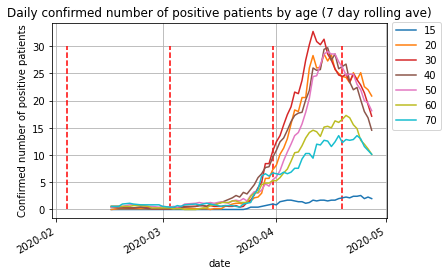

In [22]:
title = "Daily confirmed number of positive patients by age ({} day rolling ave)".format(window)
ax = df_by_age.rolling(window).mean().plot(title=title, grid=True, cmap=plt.get_cmap("tab10"))
ax.legend(bbox_to_anchor=(1, 1.03), loc='upper left')
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.ylabel("Confirmed number of positive patients")
plt.vlines(reference_dates, 0, 30, "red", linestyles='dashed')
plt.savefig(os.path.join('plots', title))
plt.show()

In [23]:
# TODO calcurate positive ratio by age class
# https://www.toukei.metro.tokyo.lg.jp/dyosoku/dy-data.htm
# https://www.toukei.metro.tokyo.lg.jp/dyosoku/dy17ra0901.xls